# fastjmd95 Tutorial

This notebooks explains how to use `fastjmd95` with Numpy, Dask, and Xarray, and under what circumstances things can go wrong.

In [1]:
import dask.array as dsa
import xarray as xr
from matplotlib import pyplot as plt

from fastjmd95 import jmd95numba

## Test Data: SOSE

We load data from the [Pangeo cloud catalog](https://catalog.pangeo.io/browse/master/ocean/SOSE/)

In [2]:
from intake import open_catalog
cat = open_catalog("https://raw.githubusercontent.com/pangeo-data/pangeo-datastore/master/intake-catalogs/ocean.yaml")
ds  = cat["SOSE"].to_dask()
ds

/srv/conda/envs/notebook/lib/python3.7/site-packages/intake/source/discovery.py:136: FutureWarning: The drivers ['geojson', 'postgis', 'shapefile', 'spatialite'] do not specify entry_points and were only discovered via a package scan. This may break in a future release of intake. The packages should be updated.
  FutureWarning)


<xarray.Dataset>
Dimensions:   (XC: 2160, XG: 2160, YC: 320, YG: 320, Z: 42, Zl: 42, Zp1: 43, Zu: 42, time: 438)
Coordinates:
    Depth     (YC, XC) float32 dask.array<chunksize=(320, 2160), meta=np.ndarray>
    PHrefC    (Z) float32 dask.array<chunksize=(42,), meta=np.ndarray>
    PHrefF    (Zp1) float32 dask.array<chunksize=(43,), meta=np.ndarray>
  * XC        (XC) float32 0.083333336 0.25 0.4166667 ... 359.75 359.9167
  * XG        (XG) float32 5.551115e-17 0.16666667 ... 359.6667 359.83334
  * YC        (YC) float32 -77.87497 -77.7083 -77.54163 ... -24.874966 -24.7083
  * YG        (YG) float32 -77.9583 -77.79163 -77.62497 ... -24.9583 -24.791632
  * Z         (Z) float32 -5.0 -15.5 -27.0 -39.5 ... -5075.0 -5325.0 -5575.0
  * Zl        (Zl) float32 0.0 -10.0 -21.0 -33.0 ... -4950.0 -5200.0 -5450.0
  * Zp1       (Zp1) float32 0.0 -10.0 -21.0 -33.0 ... -5200.0 -5450.0 -5700.0
  * Zu        (Zu) float32 -10.0 -21.0 -33.0 -46.0 ... -5200.0 -5450.0 -5700.0
    drC       (Zp1) float32 dask.array<chunksize=(43,), meta=np.ndarray>
    drF       (Z) float32 dask.array<chunksize=(42,), meta=np.ndarray>
    dxC       (YC, XG) float32 dask.array<chunksize=(320, 2160), meta=np.ndarray>
    dxG       (YG, XC) float32 dask.array<chunksize=(320, 2160), meta=np.ndarray>
    dyC       (YG, XC) float32 dask.array<chunksize=(320, 2160), meta=np.ndarray>
    dyG       (YC, XG) float32 dask.array<chunksize=(320, 2160), meta=np.ndarray>
    hFacC     (Z, YC, XC) float32 dask.array<chunksize=(42, 320, 2160), meta=np.ndarray>
    hFacS     (Z, YG, XC) float32 dask.array<chunksize=(42, 320, 2160), meta=np.ndarray>
    hFacW     (Z, YC, XG) float32 dask.array<chunksize=(42, 320, 2160), meta=np.ndarray>
    iter      (time) int64 dask.array<chunksize=(438,), meta=np.ndarray>
    rA        (YC, XC) float32 dask.array<chunksize=(320, 2160), meta=np.ndarray>
    rAs       (YG, XC) float32 dask.array<chunksize=(320, 2160), meta=np.ndarray>
    rAw       (YC, XG) float32 dask.array<chunksize=(320, 2160), meta=np.ndarray>
    rAz       (YG, XG) float32 dask.array<chunksize=(320, 2160), meta=np.ndarray>
  * time      (time) datetime64[ns] 2005-01-06 2005-01-11 ... 2010-12-31
Data variables:
    ADVr_SLT  (time, Zl, YC, XC) float32 dask.array<chunksize=(1, 42, 320, 2160), meta=np.ndarray>
    ADVr_TH   (time, Zl, YC, XC) float32 dask.array<chunksize=(1, 42, 320, 2160), meta=np.ndarray>
    ADVx_SLT  (time, Z, YC, XG) float32 dask.array<chunksize=(1, 42, 320, 2160), meta=np.ndarray>
    ADVx_TH   (time, Z, YC, XG) float32 dask.array<chunksize=(1, 42, 320, 2160), meta=np.ndarray>
    ADVy_SLT  (time, Z, YG, XC) float32 dask.array<chunksize=(1, 42, 320, 2160), meta=np.ndarray>
    ADVy_TH   (time, Z, YG, XC) float32 dask.array<chunksize=(1, 42, 320, 2160), meta=np.ndarray>
    DFrE_SLT  (time, Zl, YC, XC) float32 dask.array<chunksize=(1, 42, 320, 2160), meta=np.ndarray>
    DFrE_TH   (time, Zl, YC, XC) float32 dask.array<chunksize=(1, 42, 320, 2160), meta=np.ndarray>
    DFrI_SLT  (time, Zl, YC, XC) float32 dask.array<chunksize=(1, 42, 320, 2160), meta=np.ndarray>
    DFrI_TH   (time, Zl, YC, XC) float32 dask.array<chunksize=(1, 42, 320, 2160), meta=np.ndarray>
    DFxE_SLT  (time, Z, YC, XG) float32 dask.array<chunksize=(1, 42, 320, 2160), meta=np.ndarray>
    DFxE_TH   (time, Z, YC, XG) float32 dask.array<chunksize=(1, 42, 320, 2160), meta=np.ndarray>
    DFyE_SLT  (time, Z, YG, XC) float32 dask.array<chunksize=(1, 42, 320, 2160), meta=np.ndarray>
    DFyE_TH   (time, Z, YG, XC) float32 dask.array<chunksize=(1, 42, 320, 2160), meta=np.ndarray>
    DRHODR    (time, Zl, YC, XC) float32 dask.array<chunksize=(1, 42, 320, 2160), meta=np.ndarray>
    ETAN      (time, YC, XC) float32 dask.array<chunksize=(1, 320, 2160), meta=np.ndarray>
    EXFswnet  (time, YC, XC) float32 dask.array<chunksize=(1, 320, 2160), meta=np.ndarray>
    KPPg_SLT  (time, Zl, YC, XC) float32 dask.array<chunksize=(1, 42, 320, 2160), meta=np.ndarray>
    KPPg_TH   (time, Zl, YC, XC) float32 d

## Works: Apply directly to Numpy data 

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in rho
  


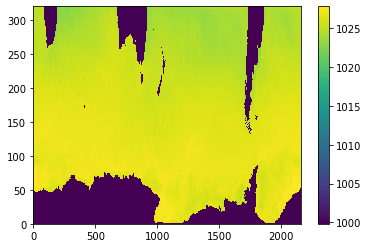

In [3]:
# load data into memory
th0 = ds.THETA[0].compute()
slt0 = ds.SALT[0].compute()
# just use constant pressure
p = 0 

# passing .values -> numpy arrays
rho_np = jmd95numba.rho(slt0.values, th0.values, 0)
plt.pcolormesh(rho_np[0])
plt.colorbar()

## Works: Apply to in-memory Xarray Data

This is very useful because it preserves coordinates.

/srv/conda/envs/notebook/lib/python3.7/site-packages/xarray/core/computation.py:604: RuntimeWarning: invalid value encountered in rho
  result_data = func(*input_data)


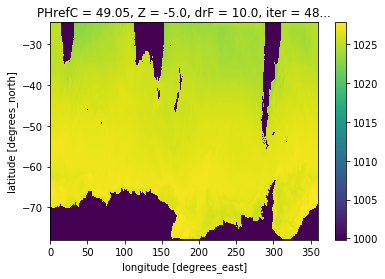

In [4]:
rho_xr = jmd95numba.rho(slt0, th0, 0)
rho_xr[0].plot()

## Works: Apply to Dask arrays with local dask scheduler

In [5]:
rho_dask = jmd95numba.rho(ds.SALT.data, ds.THETA.data, 0)
rho_dask

,Array,Chunk
Bytes,101.72 GB,232.24 MB
Shape,"(438, 42, 320, 2160)","(1, 42, 320, 2160)"
Count,1316 Tasks,438 Chunks
Type,float64,numpy.ndarray


/srv/conda/envs/notebook/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in rho
  return func(*args2)


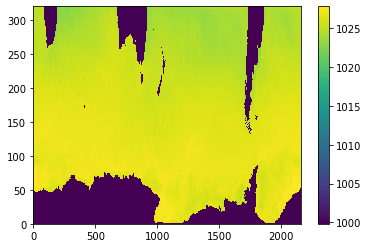

In [6]:
plt.pcolormesh(rho_dask[0, 0].compute())
plt.colorbar()

## Works: Apply to dask-backed Xarray DataArrays with local Dask scheduler

In [7]:
rho_xr_dask = jmd95numba.rho(ds.SALT, ds.THETA, 0)
rho_xr_dask

<xarray.DataArray (time: 438, Z: 42, YC: 320, XC: 2160)>
dask.array<rho, shape=(438, 42, 320, 2160), dtype=float64, chunksize=(1, 42, 320, 2160), chunktype=numpy.ndarray>
Coordinates:
    Depth    (YC, XC) float32 dask.array<chunksize=(320, 2160), meta=np.ndarray>
    PHrefC   (Z) float32 dask.array<chunksize=(42,), meta=np.ndarray>
  * XC       (XC) float32 0.083333336 0.25 0.4166667 ... 359.75 359.9167
  * YC       (YC) float32 -77.87497 -77.7083 -77.54163 ... -24.874966 -24.7083
  * Z        (Z) float32 -5.0 -15.5 -27.0 -39.5 ... -5075.0 -5325.0 -5575.0
    drF      (Z) float32 dask.array<chunksize=(42,), meta=np.ndarray>
    hFacC    (Z, YC, XC) float32 dask.array<chunksize=(42, 320, 2160), meta=np.ndarray>
    iter     (time) int64 dask.array<chunksize=(438,), meta=np.ndarray>
    rA       (YC, XC) float32 dask.array<chunksize=(320, 2160), meta=np.ndarray>
  * time     (time) datetime64[ns] 2005-01-06 2005-01-11 ... 2010-12-31

/srv/conda/envs/notebook/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in rho
  return func(*args2)


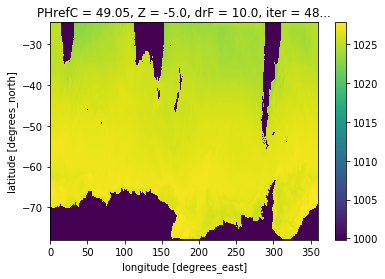

In [8]:
rho_xr_dask[0, 0].compute().plot()

## Switch to Dask Distributed Scheduler

In [9]:
from dask.distributed import Client
client = Client()

## Fails: Apply to Dask arrays with Distributed Dask scheduler

Relevant github issues:
- [xgcm/fastjmd95#1](https://github.com/xgcm/fastjmd95/issues/1)
- [dask/distributed#3450](https://github.com/dask/distributed/issues/3450)

In [10]:
try:
    rho_dask[0, 0].compute()
except Exception as e:
    # logs a KilledWorker error
    print(e)

("('rho-getitem-3b2a459bd395aa7b5824b65f862e250d', 0, 0)", <Worker 'tcp://127.0.0.1:39049', memory: 0, processing: 1>)


## Fails: Apply to dask-backed Xarray DataArrays with distributed Dask scheduler

In [11]:
try:
    rho_xr_dask[0, 0].compute()
except Exception as e:
    # logs a KilledWorker error
    print(e)

("('rho-getitem-3b2a459bd395aa7b5824b65f862e250d', 0, 0)", <Worker 'tcp://127.0.0.1:39049', memory: 0, processing: 1>)


## Workaround: Use dask.array.map_blocks

In [12]:
rho_dask_map_blocks = dsa.map_blocks(jmd95numba.rho, ds.SALT.data, ds.THETA.data, 0)
rho_dask_map_blocks

,Array,Chunk
Bytes,101.72 GB,232.24 MB
Shape,"(438, 42, 320, 2160)","(1, 42, 320, 2160)"
Count,1316 Tasks,438 Chunks
Type,float64,numpy.ndarray


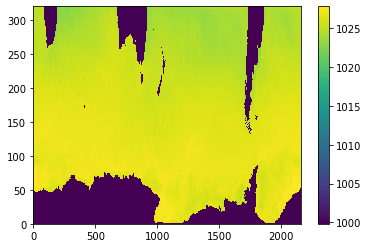

In [13]:
plt.pcolormesh(rho_dask_map_blocks[0, 0].compute())
plt.colorbar();

## Workaround: Use xarray.apply_ufunc with `dask='parallelized'`

In [14]:
rho_xr_apply_ufunc = xr.apply_ufunc(jmd95numba.rho, ds.SALT, ds.THETA, 0,
                                    dask='parallelized', output_dtypes=[ds.SALT.dtype])
rho_xr_apply_ufunc

<xarray.DataArray (time: 438, Z: 42, YC: 320, XC: 2160)>
dask.array<rho, shape=(438, 42, 320, 2160), dtype=float32, chunksize=(1, 42, 320, 2160), chunktype=numpy.ndarray>
Coordinates:
    Depth    (YC, XC) float32 dask.array<chunksize=(320, 2160), meta=np.ndarray>
    PHrefC   (Z) float32 dask.array<chunksize=(42,), meta=np.ndarray>
  * XC       (XC) float32 0.083333336 0.25 0.4166667 ... 359.75 359.9167
  * YC       (YC) float32 -77.87497 -77.7083 -77.54163 ... -24.874966 -24.7083
  * Z        (Z) float32 -5.0 -15.5 -27.0 -39.5 ... -5075.0 -5325.0 -5575.0
    drF      (Z) float32 dask.array<chunksize=(42,), meta=np.ndarray>
    hFacC    (Z, YC, XC) float32 dask.array<chunksize=(42, 320, 2160), meta=np.ndarray>
    iter     (time) int64 dask.array<chunksize=(438,), meta=np.ndarray>
    rA       (YC, XC) float32 dask.array<chunksize=(320, 2160), meta=np.ndarray>
  * time     (time) datetime64[ns] 2005-01-06 2005-01-11 ... 2010-12-31

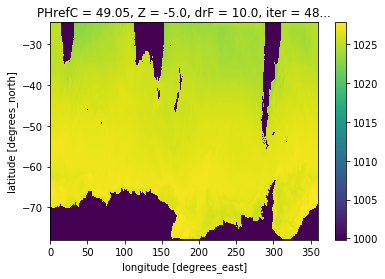

In [15]:
rho_xr_apply_ufunc[0, 0].plot()